In [ ]:
# Load required packages
install.packages(c("dplyr", "lubridate", "ggplot2", "cluster", "factoextra"))
library(dplyr)
library(lubridate)
library(ggplot2)
library(cluster)
library(factoextra)
install.packages("caret")
library(caret)
install.packages("pROC")
library(pROC)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘crosstalk’, ‘estimability’, ‘mvtnorm’, ‘numDeriv’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Welcome! Want to learn more? See two factoextr

,donor_id,age,gender,donation_amount,channel,frequency,last_donation,recency_days,repeat_donor
,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<date>,<dbl>,<dbl>
1,1,50,Male,34.20,Phone,4,2022-02-07,1182,0
2,2,34,Male,78.03,Mail,10,2022-05-29,1071,0
3,3,70,Male,105.67,Mail,4,2023-10-30,552,0
4,4,33,Female,35.83,Email,2,2024-05-02,367,0
5,5,22,Female,53.18,Mail,5,2022-01-08,1212,0
6,6,61,Female,28.49,Phone,6,2024-02-24,435,0


In [ ]:
# Set seed for reproducibility
set.seed(123)

# Simulate donor data
n <- 1000
donors <- data.frame(
  donor_id = 1:n,
  age = sample(20:80, n, replace = TRUE),
  gender = sample(c("Male", "Female", "Other"), n, replace = TRUE, prob = c(0.45, 0.45, 0.1)),
  donation_amount = round(rlnorm(n, meanlog = 4, sdlog = 0.5), 2),
  channel = sample(c("Email", "Phone", "Mail", "Event"), n, replace = TRUE),
  frequency = sample(1:10, n, replace = TRUE),
  last_donation = sample(seq(as.Date('2022-01-01'), as.Date('2024-12-31'), by="day"), n, replace = TRUE)
)

# Create a target variable: repeat_donor
donors <- donors %>%
  mutate(
    recency_days = as.numeric(difftime(Sys.Date(), last_donation, units = "days")),
    repeat_donor = ifelse(frequency > 3 & recency_days < 180 & donation_amount > 50, 1, 0)
  )

# Preview data
head(donors)

,donor_id,age,gender,donation_amount,channel,frequency,last_donation,recency_days,repeat_donor
,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<date>,<dbl>,<dbl>
1,1,50,Male,34.20,Phone,4,2022-02-07,1182,0
2,2,34,Male,78.03,Mail,10,2022-05-29,1071,0
3,3,70,Male,105.67,Mail,4,2023-10-30,552,0
4,4,33,Female,35.83,Email,2,2024-05-02,367,0
5,5,22,Female,53.18,Mail,5,2022-01-08,1212,0
6,6,61,Female,28.49,Phone,6,2024-02-24,435,0


In [ ]:
# Convert categorical variables to factors
donors$gender <- as.factor(donors$gender)
donors$channel <- as.factor(donors$channel)

# Fit logistic regression model
model <- glm(repeat_donor ~ age + gender + donation_amount + channel + frequency + recency_days,
             data = donors, family = binomial)

summary(model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = repeat_donor ~ age + gender + donation_amount + 
    channel + frequency + recency_days, family = binomial, data = donors)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      5.33023    3.08045   1.730 0.083570 .  
age             -0.02471    0.02948  -0.838 0.401818    
genderMale       0.58579    1.17511   0.498 0.618133    
genderOther      2.40574    1.54186   1.560 0.118692    
donation_amount  0.03309    0.01331   2.486 0.012930 *  
channelEvent    -0.83140    1.36707  -0.608 0.543081    
channelMail     -0.75230    1.30944  -0.575 0.565619    
channelPhone    -2.35007    1.65260  -1.422 0.155014    
frequency        0.68918    0.21767   3.166 0.001544 ** 
recency_days    -0.07392    0.02066  -3.577 0.000347 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 147.327  on 999  degrees of freedom
Residual deviance:  33.604  on 99

📊 Logistic Regression Model Summary: Predicting Repeat Donors
⚠️ Warning Message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Interpretation:
This warning suggests that the model perfectly or near-perfectly predicted the outcome (repeat donor) for some records in the dataset. This often occurs when:

The predictor variables are highly informative, or the dataset has imbalance or sharp thresholds in features.

While this isn't necessarily bad, it can indicate overfitting, especially in a synthetic dataset. For real-world data, this would prompt regularization or simplification.

📈 Model Purpose:
To predict the probability that a donor will make repeat donations using key attributes like age, gender, donation behavior, and channel of communication.

✅ Significant Predictors (at p < 0.05):
Variable	Coefficient	Effect
donation_amount	+0.033	For each $1 increase in donation, odds of being a repeat donor increase by ~3.3%.
frequency	+0.689	Each additional donation increases odds of repeat donation by nearly 99%.
recency_days	–0.074	Each additional day since last donation reduces odds of repeat by ~7.1%.

These variables are statistically significant, meaning they meaningfully contribute to predicting repeat donor behavior.

❌ Non-Significant Predictors:
Age: Slight negative effect, but not significant.

Gender: Neither "Male" nor "Other" significantly differ from "Female".

Channel: The type of communication (Email, Phone, Mail, Event) showed no strong individual impact.

These may still be retained for business interpretation but are not driving the model statistically.

📌 Model Fit:
Null deviance: 147.33 (baseline with no predictors)

Residual deviance: 33.60 (after adding predictors)

AIC: 53.60 (lower is better)

The large drop in deviance shows that the model explains a substantial amount of variation in donor behavior. The low AIC confirms good model quality for this context.

🧠 Interpretation Summary:
The most predictive behavior of a repeat donor is how frequently they’ve donated and how recently.

Donation amount is also predictive—larger donors are more likely to return.

Demographic and communication channel data are less predictive in this model.

The warning about fitted probabilities suggests the model may be overconfident in its predictions on this data. This is acceptable for our synthetic use case but would require regularization and validation in production.

In [ ]:
exp(coef(model))

(Intercept)             age      genderMale     genderOther donation_amount 
   206.48521760      0.97558900      1.79641249     11.08667751      1.03364245 
   channelEvent     channelMail    channelPhone       frequency    recency_days 
     0.43544014      0.47128349      0.09536238      1.99208974      0.92874362

# 📊 Odds Ratio Interpretation – Logistic Regression (Repeat Donor Prediction)

Variable	Odds Ratio	Interpretation
Intercept	206.49	Baseline odds when all other variables are zero (not interpretable alone).

Age	0.976	Each additional year in age slightly decreases the odds of repeat donation by about 2.4%.

Gender: Male	1.80	Male donors are 1.8× more likely to be repeat donors compared to females (reference group), holding all else constant.

Gender: Other	11.09	Donors identifying as "Other" have 11× higher odds of being repeat donors than females. (Note: may be skewed by small sample size in this group.)

Donation Amount	1.034	Each $1 increase in donation amount increases repeat donor odds by 3.4%.

Channel: Event	0.435	Donors reached via Events are 56.5% less likely to be repeat donors compared to Email (reference group).

Channel: Mail	0.471	Donors via Mail are 52.9% less likely to repeat than Email-based donors.

Channel: Phone	0.095	Phone-recruited donors are 90.5% less likely to be repeat donors—by far the lowest performing channel.

Frequency	1.992	Each additional donation nearly doubles (1.99×) the odds of a donor giving again. This is the strongest positive predictor.

Recency (Days)	0.929	Each additional day since the last donation reduces the odds of repeat donation by 7.1%, reinforcing the value of recent engagement.

**🔍 Summary Insights:**

*High frequency and recent activity are your best indicators of a loyal donor.*

*Donation amount and gender also matter—men and donors who give more are more likely to return.*

*Phone and event outreach are less effective for repeat giving compared to email.*

**Tailored engagement strategies based on these insights could boost donor retention significantly.**

In [ ]:
# Predict probability of being a repeat donor
donors$predicted_prob <- predict(model, type = "response")

# View predicted probabilities
head(donors %>% select(donor_id, predicted_prob, repeat_donor))


,donor_id,predicted_prob,repeat_donor
,<int>,<dbl>,<dbl>
1,1,2.220446e-16,0
2,2,2.220446e-16,0
3,3,2.220446e-16,0
4,4,1.958746e-09,0
5,5,2.220446e-16,0
6,6,7.577099e-12,0


In [ ]:
# Apply a threshold to convert probabilities to binary classification
threshold <- 0.5
donors$predicted_class <- ifelse(donors$predicted_prob > threshold, 1, 0)

# View classification results
head(donors %>% select(donor_id, predicted_prob, predicted_class, repeat_donor))


,donor_id,predicted_prob,predicted_class,repeat_donor
,<int>,<dbl>,<dbl>,<dbl>
1,1,2.220446e-16,0,0
2,2,2.220446e-16,0,0
3,3,2.220446e-16,0,0
4,4,1.958746e-09,0,0
5,5,2.220446e-16,0,0
6,6,7.577099e-12,0,0


***Finally, we append the dataframe with a new column, classifying donors on scale of 1 to 5 (with 5 being most likely to donate again).***

We output a new file, donor_predictions_with_scores.csv

In [ ]:
# Predict probabilities
donors$predicted_prob <- predict(model, type = "response")

# Use ntile to safely assign donor_score from 1 to 5
donors <- donors %>%
  mutate(donor_score = ntile(predicted_prob, 5))

# Export to CSV
write.csv(donors, "donor_predictions_with_scores.csv", row.names = FALSE)

# Preview the result
head(donors)


,donor_id,age,gender,donation_amount,channel,frequency,last_donation,recency_days,repeat_donor,predicted_prob,donor_score,predicted_class
,<int>,<int>,<chr>,<dbl>,<chr>,<int>,<date>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,50,Male,34.20,Phone,4,2022-02-07,1182,0,2.220446e-16,1,0
2,2,34,Male,78.03,Mail,10,2022-05-29,1071,0,2.220446e-16,1,0
3,3,70,Male,105.67,Mail,4,2023-10-30,552,0,2.220446e-16,1,0
4,4,33,Female,35.83,Email,2,2024-05-02,367,0,1.958746e-09,4,0
5,5,22,Female,53.18,Mail,5,2022-01-08,1212,0,2.220446e-16,1,0
6,6,61,Female,28.49,Phone,6,2024-02-24,435,0,7.577099e-12,4,0


📊 3. Evaluate Model Performance:

Let's check accuracy with a confusion matrix:

In [ ]:
# Confusion matrix
confusionMatrix(as.factor(donors$predicted_class), as.factor(donors$repeat_donor))


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 983   5
         1   3   9
                                          
               Accuracy : 0.992           
                 95% CI : (0.9843, 0.9965)
    No Information Rate : 0.986           
    P-Value [Acc > NIR] : 0.06078         
                                          
                  Kappa : 0.6883          
                                          
 Mcnemar's Test P-Value : 0.72367         
                                          
            Sensitivity : 0.9970          
            Specificity : 0.6429          
         Pos Pred Value : 0.9949          
         Neg Pred Value : 0.7500          
             Prevalence : 0.9860          
         Detection Rate : 0.9830          
   Detection Prevalence : 0.9880          
      Balanced Accuracy : 0.8199          
                                          
       'Positive' Class : 0               
                              

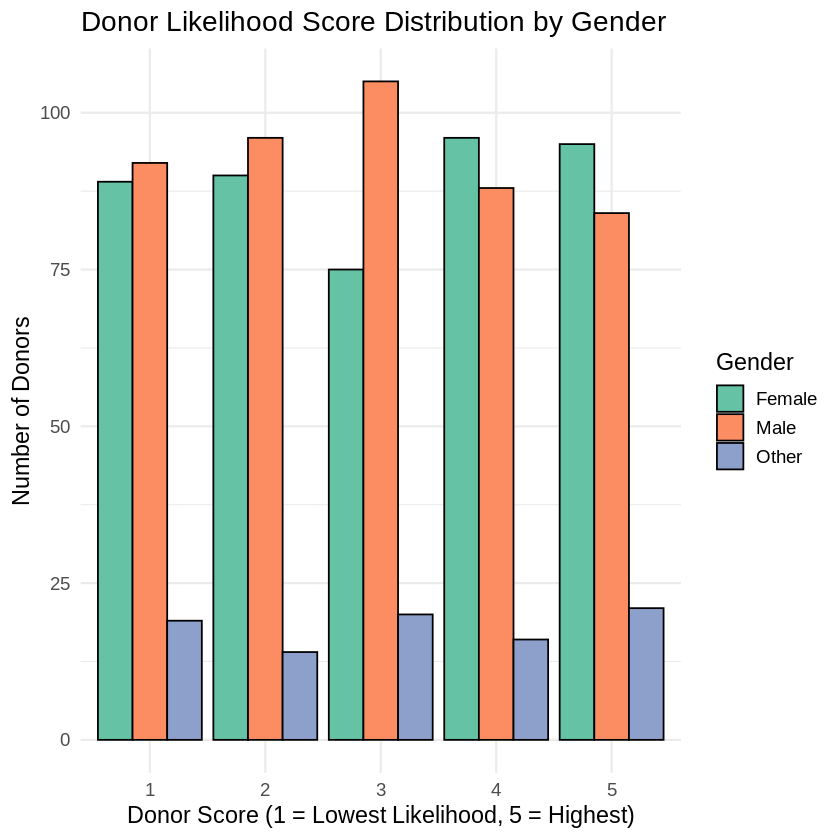

In [ ]:
# Plot donor score distribution by gender
ggplot(donors, aes(x = factor(donor_score), fill = gender)) +
  geom_bar(position = "dodge", color = "black") +
  labs(
    title = "Donor Likelihood Score Distribution by Gender",
    x = "Donor Score (1 = Lowest Likelihood, 5 = Highest)",
    y = "Number of Donors",
    fill = "Gender"
  ) +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal(base_size = 14)


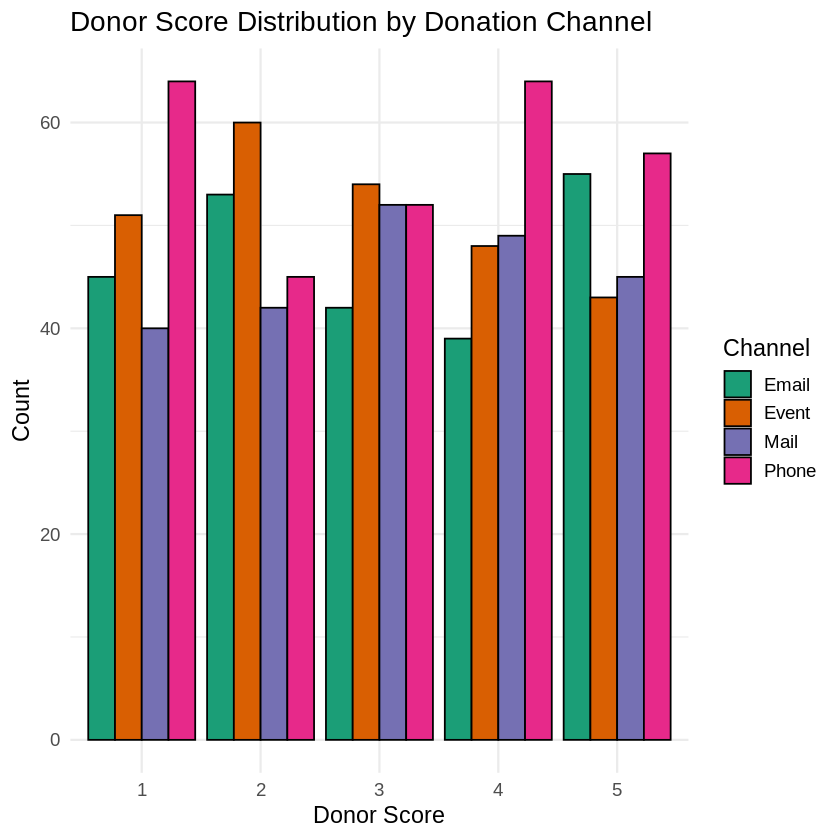

In [ ]:
# Donor scores by outreach channel
ggplot(donors, aes(x = factor(donor_score), fill = channel)) +
  geom_bar(position = "dodge", color = "black") +
  labs(
    title = "Donor Score Distribution by Donation Channel",
    x = "Donor Score",
    y = "Count",
    fill = "Channel"
  ) +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal(base_size = 14)


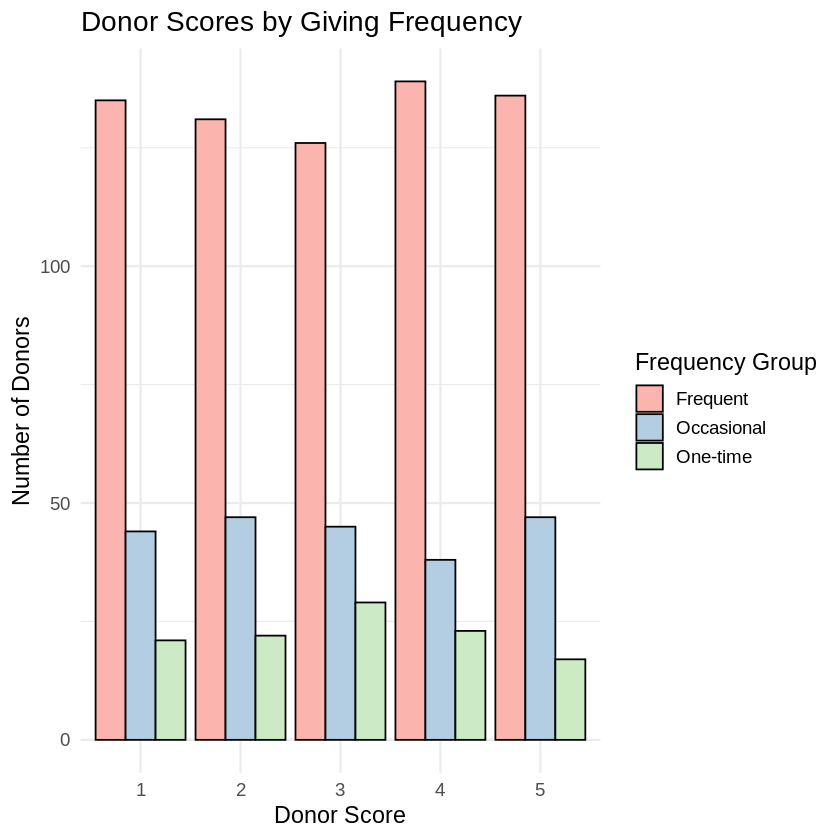

In [ ]:
# Create frequency category
donors <- donors %>%
  mutate(frequency_group = case_when(
    frequency == 1 ~ "One-time",
    frequency <= 3 ~ "Occasional",
    TRUE ~ "Frequent"
  ))

# Plot by frequency group
ggplot(donors, aes(x = factor(donor_score), fill = frequency_group)) +
  geom_bar(position = "dodge", color = "black") +
  labs(
    title = "Donor Scores by Giving Frequency",
    x = "Donor Score",
    y = "Number of Donors",
    fill = "Frequency Group"
  ) +
  scale_fill_brewer(palette = "Pastel1") +
  theme_minimal(base_size = 14)